# Project 4: Humanizing Customer Complaints 

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"koushiktcs12","key":"4449598e554095077211afd0e6e96392"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
omarhanyy/500-greatest-songs-of-all-time                  500 Greatest Songs of All Time                      33KB  2020-10-26 13:36:09            661  
terenceshin/covid19s-impact-on-airport-traffic            COVID-19's Impact on Airport Traffic               106KB  2020-10-19 12:40:17           2337  
sootersaalu/amazon-top-50-bestselling-books-2009-2019     Amazon Top 50 Bestselling Books 2009 - 2019         15KB  2020-10-13 09:39:21           2230  
thomaskonstantin/highly-rated-children-books-and-stories  Highly Rated Children Books And Stories            106KB  2020-10-24 12:09:59            448  
tunguz/euro-parliament

In [ ]:
!kaggle datasets download -d watts2/glove6b50dtxt
!kaggle datasets download -d danielwillgeorge/glove6b100dtxt
!kaggle datasets download -d incorpes/glove6b200d
!kaggle datasets download -d thanakomsn/glove6b300dtxt
!kaggle datasets download -d leadbest/googlenewsvectorsnegative300
!unzip \*.zip  && rm *.zip
!ls

 96% 65.0M/67.7M [00:00<00:00, 106MB/s] 
100% 67.7M/67.7M [00:00<00:00, 126MB/s]
 93% 122M/131M [00:01<00:00, 115MB/s]
100% 131M/131M [00:01<00:00, 108MB/s]
 95% 245M/259M [00:02<00:00, 108MB/s]
100% 259M/259M [00:02<00:00, 129MB/s]
 96% 372M/386M [00:03<00:00, 84.6MB/s]
100% 386M/386M [00:03<00:00, 110MB/s] 
100% 3.17G/3.17G [00:41<00:00, 55.8MB/s]
100% 3.17G/3.17G [00:41<00:00, 82.5MB/s]
Archive:  googlenewsvectorsnegative300.zip
replace GoogleNews-vectors-negative300.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GoogleNews-vectors-negative300.bin  A
A

  inflating: GoogleNews-vectors-negative300.bin.gz  

Archive:  glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       

Archive:  glove6b50dtxt.zip
  inflating: glove.6B.50d.txt        

Archive:  glove6b300dtxt.zip
  inflating: glove.6B.300d.txt       

Archive:  glove6b200d.zip
  inflating: glove.6B.200d.txt       

5 archives were successfully processed.
 Complaint_text_dist.csv
 Complaint_text_slctd_dist.csv
 df_prod

In [ ]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers
!pip install --upgrade gensim
!pip install pyLDAvis3
!pip install stop-words
!python -m pip install -U pyLDAvis
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)
ERROR: Could not find a version that satisfies the requirement pyLDAvis3 (from versions: none)
ERROR: No matching distribution found for pyLDAvis3
Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.6/dist-packages (2.1.2)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Section 1: Importing Packages and Loading Data

In [ ]:
import numpy as np
import pandas as pd
seed = 69 # set random seed for whole document

# Graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying dataframes
from IPython.display import display

# Natural Language Processing Thingamajibs
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec, word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import gensim

# Classifiers
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Metrics to score classifiers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss

# Data splitting, CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Lifesaver
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Load CSV file
df= pd.read_csv(r'/content/drive/My Drive/CFPB LDA/consumer_complaints.csv')
# This step is not executable because the .csv file is not in the folder

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [ ]:
df_complaints_issue_bkp = df
df = df[df["consumer_complaint_narrative"].notnull() == True]
df = df.drop_duplicates()
print(df.shape)
df['Text_Length'] = df["consumer_complaint_narrative"].str.len()
#print(df[(df['Product']=='Credit reporting')]['Issue'].value_counts())
#df=df[(df['Product']=='Credit reporting') & (df['Issue'] != 'Credit monitoring or identity protection')].sort_values(by=['Issue','Text_Length']).groupby('Issue').head(1500).reset_index(drop=True)
print(df.shape)

(66806, 18)
(66806, 19)


## Section 1.1: Data Cleaning

In [ ]:
# Column Cleaning First. Columns are super nastily named
df.rename(columns={'date_received':'DATE_RECEIVED',
                  'product':'PRODUCT',
                  'sub_product':'SUB_PRODUCT',
                  'issue':'ISSUE',
                  'sub_issue':'SUB_ISSUE',
                  'consumer_complaint_narrative':'CONSUMER_COMPLAINT_NARRATIVE',
                  'company_public_response':'COMPANY_PUBLIC_RESPONSE',
                   'company':'COMPANY',
                   'state':'STATE',
                   'zipcode':'ZIP_CODE',
                   'tags':'TAGS',
                   'consumer_consent_provided':'CONSUMER_CONSENT_PROVIDED',
                   'submitted_via':'SUBMITTED_VIA',
                   'date_sent_to_company':'DATE_SENT_TO_COMPANY',
                   'company_response_to_consumer':'COMPANY_RESPONSE_TO_CONSUMER',
                   'timely_response':'TIMELY_RESPONSE',
                   'consumer_disputed?':'CONSUMER_DISPUTED',
                   'complaint_id':'COMPLAINT_ID'
                  }, inplace=True)

In [ ]:
# Since we just want to do text classification with an associated label
# We only keep rows that have customer complaints in them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66806 entries, 190126 to 553096
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DATE_RECEIVED                 66806 non-null  object
 1   PRODUCT                       66806 non-null  object
 2   SUB_PRODUCT                   46351 non-null  object
 3   ISSUE                         66806 non-null  object
 4   SUB_ISSUE                     32932 non-null  object
 5   CONSUMER_COMPLAINT_NARRATIVE  66806 non-null  object
 6   COMPANY_PUBLIC_RESPONSE       32776 non-null  object
 7   COMPANY                       66806 non-null  object
 8   STATE                         66620 non-null  object
 9   ZIP_CODE                      66617 non-null  object
 10  TAGS                          11417 non-null  object
 11  CONSUMER_CONSENT_PROVIDED     66806 non-null  object
 12  SUBMITTED_VIA                 66806 non-null  object
 13  DATE_SENT_

### Section 1.1.1: Dropping all rows that do not have Customer Complaint entries in them

In [ ]:
df.dropna(axis=0, subset=['CONSUMER_COMPLAINT_NARRATIVE'],inplace=True)

### Section 1.1.2: Subsetting Dataframe for Text Multi-Classification Problem

In [ ]:
# Subsetting dataframe into columns useful for our text multi-classification problem
df_product_issue_and_complaint = df[['PRODUCT', 'ISSUE', 'CONSUMER_COMPLAINT_NARRATIVE']]

# Renaming columns to something easier
df_product_issue_and_complaint.rename(columns={'CONSUMER_COMPLAINT_NARRATIVE':'CONSUMER_COMPLAINT'},inplace=True) 
df.rename(columns={'CONSUMER_COMPLAINT_NARRATIVE':'CONSUMER_COMPLAINT'},inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Pickling our subsetted dataframe
with open('df_product_issue_and_complaint.pickle', 'wb') as to_write:
     pickle.dump(df_product_issue_and_complaint, to_write)

In [ ]:
files.download('df_product_issue_and_complaint.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Loading our pickled subsetted dataframe
with open('df_product_issue_and_complaint.pickle', 'rb') as to_read:
    df_product_issue_and_complaint = pickle.load(to_read)

# Section 2: Understanding/Cleaning Our Data

In [ ]:
# Checking our dataframe
df_product_issue_and_complaint.info()

# Great! We have no null values in each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66806 entries, 190126 to 553096
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT             66806 non-null  object
 1   ISSUE               66806 non-null  object
 2   CONSUMER_COMPLAINT  66806 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


### We have a wooping 463,991 entries in our dataframe.
This might cause our comptuer to crash. So we gotta reduce it.

In [ ]:
# Now let's take a look at some observations of what these rows look like
df_product_issue_and_complaint.head(5)

,PRODUCT,ISSUE,CONSUMER_COMPLAINT
190126,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...
190155,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...
190208,Mortgage,Credit decision / Underwriting,XXXX was submitted XX/XX/XXXX. At the time I s...


In [ ]:
print(df['PRODUCT'].value_counts())
pd.DataFrame(df.groupby(['PRODUCT','ISSUE'])['Text_Length'].describe()).to_csv('Complaint_text_dist.csv')

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: PRODUCT, dtype: int64


In [ ]:
files.download('Complaint_text_dist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
grouped_counts = df.groupby(['PRODUCT','ISSUE'])['CONSUMER_COMPLAINT'].count()
grouped_counts = df.groupby(['PRODUCT','ISSUE'])['CONSUMER_COMPLAINT'].count()
grouped_counts = grouped_counts.loc[grouped_counts.values<50000]
grouped_counts_flt = grouped_counts.loc[grouped_counts.values>=1000]
print(grouped_counts_flt.sort_values(ascending=True))
print(type(grouped_counts_flt))
grouped_counts_flt = pd.DataFrame(grouped_counts_flt)
grouped_counts_flt = grouped_counts_flt.reset_index()

PRODUCT                  ISSUE                                   
Consumer Loan            Problems when you are unable to pay         1006
Mortgage                 Settlement process and costs                1017
Credit reporting         Unable to get credit report/credit score    1032
Credit card              Billing disputes                            1222
Debt collection          Improper contact or sharing of info         1317
Student loan             Dealing with my lender or servicer          1357
Debt collection          Taking/threatening an illegal action        1397
Bank account or service  Deposits and withdrawals                    1401
Mortgage                 Application, originator, mortgage broker    1616
Debt collection          False statements or representation          1647
Consumer Loan            Managing the loan or lease                  1650
Credit reporting         Credit reporting company's investigation    1990
Bank account or service  Account opening, clos

In [ ]:
df_product_issue_and_complaint_flt = pd.merge(df_product_issue_and_complaint, grouped_counts_flt[['PRODUCT', 'ISSUE']], how='inner', on=['PRODUCT', 'ISSUE'])

In [ ]:
df_product_issue_and_complaint_flt.info()#335967

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52140 entries, 0 to 52139
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT             52140 non-null  object
 1   ISSUE               52140 non-null  object
 2   CONSUMER_COMPLAINT  52140 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [ ]:
pd.DataFrame(df_product_issue_and_complaint_flt.groupby(['PRODUCT','ISSUE'])['CONSUMER_COMPLAINT'].count()).to_csv('Complaint_text_slctd_dist.csv')
print(df_product_issue_and_complaint_flt.groupby(['PRODUCT','ISSUE'])['CONSUMER_COMPLAINT'].count().sort_values(ascending=True))

PRODUCT                  ISSUE                                   
Consumer Loan            Problems when you are unable to pay         1006
Mortgage                 Settlement process and costs                1017
Credit reporting         Unable to get credit report/credit score    1032
Credit card              Billing disputes                            1222
Debt collection          Improper contact or sharing of info         1317
Student loan             Dealing with my lender or servicer          1357
Debt collection          Taking/threatening an illegal action        1397
Bank account or service  Deposits and withdrawals                    1401
Mortgage                 Application, originator, mortgage broker    1616
Debt collection          False statements or representation          1647
Consumer Loan            Managing the loan or lease                  1650
Credit reporting         Credit reporting company's investigation    1990
Bank account or service  Account opening, clos

In [ ]:
files.download('Complaint_text_slctd_dist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Section 2.1: Exploring Consumer Complaints

In [ ]:
# # What do a few of the entries in the consumer complaint section look like?

df_Mortgage = df_product_issue_and_complaint_flt[df_product_issue_and_complaint_flt['PRODUCT'] == 'Mortgage']
df_Mortgage.rename(columns={'PRODUCT': 'Mortgage'}, inplace=True)

for complaint in df_Mortgage.CONSUMER_COMPLAINT[:2]:
     print(complaint)
     print('\n')

In XX/XX/XXXX my wages that I earned at my job decreased by almost half, by XX/XX/XXXX I knew I was in trouble with my home loan. I began contacting WFB whom my home loan is with, for assitance and options. 
In early XX/XX/XXXX I began the Loan Modification process with Wells Fargo Bank. I was told that they would not assist me with anything financial on my home loan until I fell 90 days behind, though at the time I started to inquire for assistance from WFB I was only a few weeks behind. So, I began working with a program called XXXX. They approved me for a variety of assistence and reached out to Wells Fargo Bank to determine what they could assist with. Wells Fargo then turned down the assistance from XXXX and finally offered to do a Loan Modification for me. The outcome was totally unknow about what I would be offered in the end by WFB for assistance. Wells Fargo lost my paperwork twice during this process, so it took 2 months from the time I started to the time my paperwork began 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Jesus christ, it doesn't seem like we can glean anything very well from this wall of text either.
1. It is **immensely hard to read** because it's so long (that's what she said)   

2. Therefore, by being able to automatically correctly categorize/file customer complaints into their respective complaint type (credit reporting, loan complaint, etc.) **with just the customer input**, we can reduce the amount of computational stress and effort of an individual human.  
  
3. Additionally, a further step we can take is to have our program do some kind of summarization or pseudo-summarization (tf-idf) on the whole wall of text that one has to read.

**Therefore, we verify our model based on accuracy this time.**


## Section 2.2: Exploring Product

In [ ]:
# Exploring the number of mutli-class categories we have
print('--------------')
print('Categories in PRODUCT column:')
print('--------------\n')
print(df_product_issue_and_complaint_flt['PRODUCT'].unique(), '\n')
print('--------------')
print('# of unique categories: ', df_product_issue_and_complaint_flt['PRODUCT'].nunique())
print('--------------')

--------------
Categories in PRODUCT column:
--------------

['Debt collection' 'Consumer Loan' 'Mortgage' 'Credit reporting'
 'Bank account or service' 'Student loan' 'Credit card'] 

--------------
# of unique categories:  7
--------------


### We see that some of the categories are repeated.
* 'Credit card' vs 'Credit card or prepaid card'
* 'Prepaid card' vs 'Credit card or prepaid card'
* 'Credit reporting' vs 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Money transfers' vs 'Money transfer, virtual currency, or money service'
* 'Payday loan' vs 'Payday loan, title loan, or personal loan'
* 'Virtual currency' vs 'Money transfer, virtual currency, or money service' 'Money transfers'

There seems to be some sort of overlap between the categories, and I have no freakin clue why it is put this way. So why don't we simplify our problem by combining these categories together?  
  
But of course - let us do some **data visualizations** to gain more insights about the spread of our categories, shall we? 
  
### OMG WOW DATA VISUALIZATION YOU SAY??

### Section 2.2.1: Data Visualization on Categories in PRODUCT

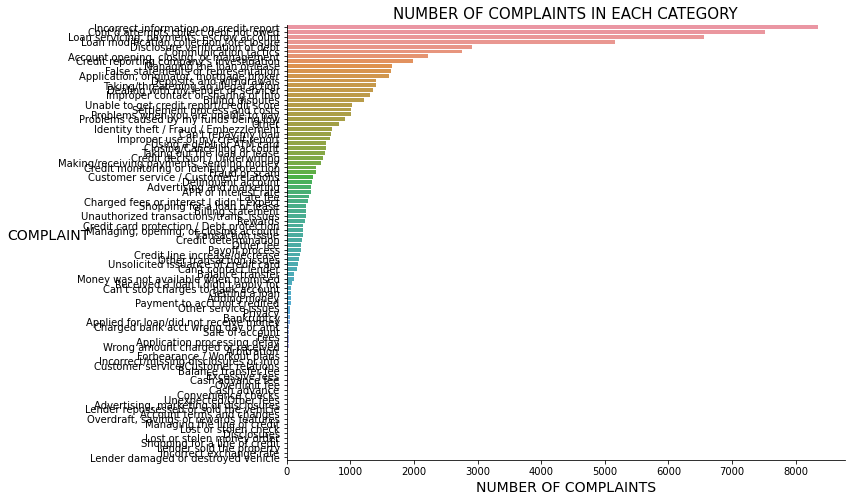

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(y='ISSUE', 
                   data=df_product_issue_and_complaint, 
                   order=df_product_issue_and_complaint['ISSUE'].value_counts().index)

ax.set_title('NUMBER OF COMPLAINTS IN EACH CATEGORY',size=15)

# Setting labels
# Dealing with y-labels
ax.set_ylabel('COMPLAINT', rotation=0, size=14, labelpad=10)
              
# Dealing with x-labels
ax.set_xlabel('NUMBER OF COMPLAINTS', size=14)

sns.despine()
            
plt.savefig('freq_of_uncombined_class.png', transparency=True)

In [ ]:
print('Number of rows in Dataframe: ', len(df_product_issue_and_complaint_flt))


Number of rows in Dataframe:  52140


This is seriously way too huge. Let's just scope our problem down into more bite-sized chunks our computer can actually handle.

### We observe some aggregated columns here.
Let's drop those columns first. Since we want a more accurate/specific label for our predictions. The columns are:
* Credit reporting, credit repair services, or other personal consumer reports
* Credit card or prepaid card
* Money transfer, virtual currency, or money service
* Payday loan, title loan, or personal loan

### Section 2.2.2: DataFrame Reduction (else we won't even be able to do processing)

#### Section 2.2.2.1: Category Dropping

In [ ]:
# Pre-drop category value_counts
df_product_issue_and_complaint_flt.PRODUCT.value_counts()

Debt collection            17552
Mortgage                   14350
Credit reporting           11374
Bank account or service     3629
Consumer Loan               2656
Student loan                1357
Credit card                 1222
Name: PRODUCT, dtype: int64

In [ ]:
# Dropping rows with the aggregated columns
df_product_issue_and_complaint_flt.drop(
    df_product_issue_and_complaint_flt[
    df_product_issue_and_complaint_flt.PRODUCT == 
    'Credit reporting, credit repair services, or other personal consumer reports'].index, 
    inplace=True) # credit_aggregated

df_product_issue_and_complaint_flt.drop(
    df_product_issue_and_complaint_flt[
    df_product_issue_and_complaint_flt.PRODUCT == 
    'Credit card or prepaid card'].index, 
    inplace=True) # cred_or_prepaid

df_product_issue_and_complaint_flt.drop(
    df_product_issue_and_complaint_flt[
    df_product_issue_and_complaint_flt.PRODUCT == 
    'Money transfer, virtual currency, or money service'].index, 
    inplace=True) # money_virtual_service

df_product_issue_and_complaint_flt.drop(
    df_product_issue_and_complaint_flt[
    df_product_issue_and_complaint_flt.PRODUCT == 
    'Payday loan, title loan, or personal loan'].index, 
    inplace=True) # payday_title_personal_loan

#### Visualizing Leftover Categories (after dropping the ones stated above)

Text(0.5, 0, 'NUMBER OF COMPLAINTS')

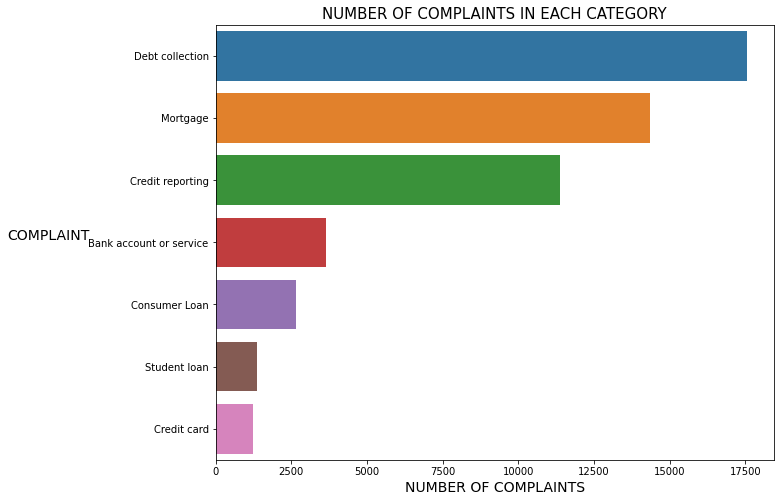

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(y='PRODUCT', 
                   data=df_product_issue_and_complaint_flt, 
                   order=df_product_issue_and_complaint_flt['PRODUCT'].value_counts().index)

ax.set_title('NUMBER OF COMPLAINTS IN EACH CATEGORY',size=15)

# Setting labels
# Dealing with y-labels
ax.set_ylabel('COMPLAINT', rotation=0, labelpad=40, size=14)
              
# Dealing with x-labels
ax.set_xlabel('NUMBER OF COMPLAINTS', size=14)

#### Section 2.2.2.2: Combining Categories

In [ ]:
## Combining Loans together to make this a simplier classification problem

df_product_issue_and_complaint_flt.replace('Student loan', 'Loan', inplace=True)
df_product_issue_and_complaint_flt.replace('Consumer Loan', 'Loan', inplace=True)
df_product_issue_and_complaint_flt.replace('Payday loan', 'Loan', inplace=True)
df_product_issue_and_complaint_flt.replace('Vehicle loan or lease', 'Loan', inplace=True)

# Placing Virtual currency into other financial service
df_product_issue_and_complaint_flt.replace('Virtual currency', 'Other financial service', inplace=True)

#### Section 2.2.2.3: Leftover Categories Dataframe Reduction

In [ ]:
df_product_issue_and_complaint_flt.PRODUCT.value_counts()

Debt collection            17552
Mortgage                   14350
Credit reporting           11374
Loan                        4013
Bank account or service     3629
Credit card                 1222
Name: PRODUCT, dtype: int64

In [ ]:
df_product_issue_and_complaint_flt.info()  # 290k rows. jesus christ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52140 entries, 0 to 52139
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT             52140 non-null  object
 1   ISSUE               52140 non-null  object
 2   CONSUMER_COMPLAINT  52140 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [ ]:
# Reducing dataframe to 30k entries
# Need to reduce all categories by 80%

percentage_reduction = 0.8

# Debt Collection Reduction
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_flt.drop(
    df_product_issue_and_complaint_flt[df_product_issue_and_complaint_flt['PRODUCT'] == 'Debt collection'].sample(frac=percentage_reduction).index)

# Mortgage Reduction
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Mortgage'].sample(frac=percentage_reduction).index)

# Loan
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Loan'].sample(frac=percentage_reduction).index)

# Credit reporting
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Credit reporting'].sample(frac=percentage_reduction).index)

# Credit card
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Credit card'].sample(frac=percentage_reduction).index)

# Checking or savings account
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Checking or savings account'].sample(frac=percentage_reduction).index)

# Bank account or service
df_product_issue_and_complaint_reduced = \
df_product_issue_and_complaint_reduced.drop(
    df_product_issue_and_complaint_reduced[
        df_product_issue_and_complaint_reduced['PRODUCT'] == 'Bank account or service'].sample(frac=percentage_reduction).index)

# # Money transfers (too little to be reduced)
# df_product_issue_and_complaint_reduced = \
# df_product_issue_and_complaint_reduced.drop(
#     df_product_issue_and_complaint_reduced[
#         df_product_issue_and_complaint_reduced['PRODUCT'] == 'Money transfers'].sample(frac=.9).index)

# # Prepaid card (too little to be reduced)
# df_product_issue_and_complaint_reduced = \
# df_product_issue_and_complaint_reduced.drop(
#     df_product_issue_and_complaint_reduced[
#         df_product_issue_and_complaint_reduced['PRODUCT'] == 'Prepaid card'].sample(frac=.9).index)

# # Other financial service (too little to be reduced)
# df_product_issue_and_complaint_reduced = \
# df_product_issue_and_complaint_reduced.drop(
#     df_product_issue_and_complaint_reduced[
#         df_product_issue_and_complaint_reduced['PRODUCT'] == 'Other financial service'].sample(frac=.9).index)

In [ ]:
df_product_issue_and_complaint_reduced.PRODUCT.value_counts()

Debt collection            3510
Mortgage                   2870
Credit reporting           2275
Loan                        803
Bank account or service     726
Credit card                 244
Name: PRODUCT, dtype: int64

In [ ]:
df_product_issue_and_complaint_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10428 entries, 1 to 52137
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT             10428 non-null  object
 1   ISSUE               10428 non-null  object
 2   CONSUMER_COMPLAINT  10428 non-null  object
dtypes: object(3)
memory usage: 325.9+ KB


In [ ]:
# Exploring the new number of mutli-class categories we have
print('--------------')
print('Categories in PRODUCT column:')
print('--------------\n')
print(df_product_issue_and_complaint_reduced['ISSUE'].unique(), '\n')
print('--------------')
print('# of unique categories: ', df_product_issue_and_complaint_reduced['ISSUE'].nunique())
print('--------------')

# Great! Now we are down to 10 classes. 

--------------
Categories in PRODUCT column:
--------------

["Cont'd attempts collect debt not owed" 'Managing the loan or lease'
 'Loan modification,collection,foreclosure'
 'Loan servicing, payments, escrow account'
 'Application, originator, mortgage broker'
 'False statements or representation'
 'Incorrect information on credit report'
 'Unable to get credit report/credit score' 'Settlement process and costs'
 'Improper contact or sharing of info' 'Deposits and withdrawals'
 'Communication tactics' 'Account opening, closing, or management'
 'Problems when you are unable to pay'
 'Dealing with my lender or servicer'
 'Taking/threatening an illegal action'
 "Credit reporting company's investigation"
 'Disclosure verification of debt' 'Billing disputes'] 

--------------
# of unique categories:  19
--------------


### Section 2.2.3: Data Visualizing on newly combined classes

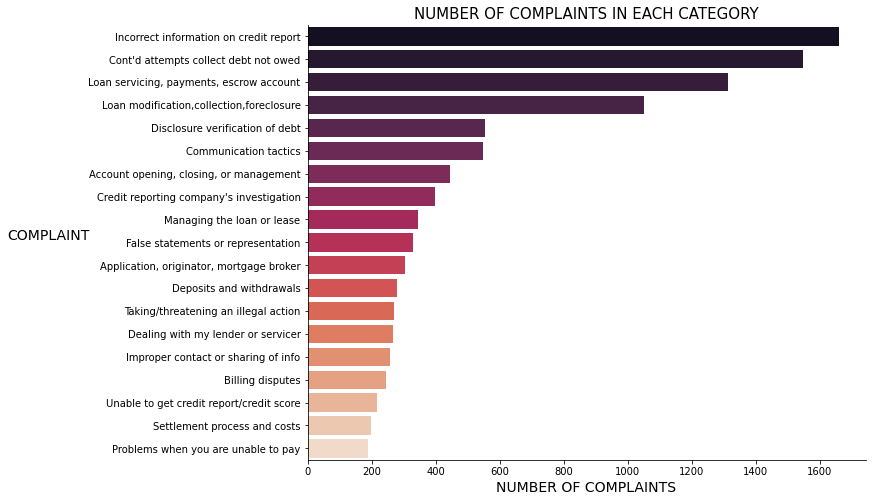

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(y='ISSUE', 
                   data=df_product_issue_and_complaint_reduced, 
                   order=df_product_issue_and_complaint_reduced['ISSUE'].value_counts().index,
                   palette='rocket'        # change the color of this graph LATER
                  )

ax.set_title('NUMBER OF COMPLAINTS IN EACH CATEGORY',size=15)

# Setting labels
# Dealing with y-labels
ax.set_ylabel('COMPLAINT', rotation=0, labelpad=40, size=14)
              
# Dealing with x-labels
ax.set_xlabel('NUMBER OF COMPLAINTS', size=14)

sns.despine()
plt.savefig('freq_of_removed_classes_and_reduced_observations.png', transparency=True)

We can see from the graph that there lies a major class imbalance (again)  
We have to deal with this when we are going to use our model for prediction  
Now we are doing multilabel prediction. HOORAY!

### Section 2.2.4: Label Encoding Categories

In [ ]:
# Applying encoding to the ISSUE column
df_product_issue_and_complaint_reduced['ISSUE_ID'] = df_product_issue_and_complaint_reduced['ISSUE'].factorize()[0] 

#.factorize[0] arranges the index of each encoded number accordingly to the 
# index of your categorical variables in the ISSUE column


# Creates a dataframe of the ISSUE to their respective ISSUE_ID
category_id_df = df_product_issue_and_complaint_reduced[['ISSUE', 'ISSUE_ID']].drop_duplicates()


# Dictionaries for future use. Creating our cheatsheets for what each encoded label represents.
category_to_id = dict(category_id_df.values) # Creates a ISSUE: ISSUE_ID key-value pair
id_to_category = dict(category_id_df[['ISSUE_ID', 'ISSUE']].values)  # Creates a ISSUE_ID: ISSUE key-value pair

# New dataframe
df_product_issue_and_complaint_reduced.head(10)

,PRODUCT,ISSUE,CONSUMER_COMPLAINT,ISSUE_ID
1,Debt collection,Cont'd attempts collect debt not owed,a incorrect reporting by cavalry portfolio on ...,0
5,Debt collection,Cont'd attempts collect debt not owed,"Reached out to them however, never got a respo...",0
9,Debt collection,Cont'd attempts collect debt not owed,Sent a few letter to different addresses liste...,0
11,Debt collection,Cont'd attempts collect debt not owed,I paid the debt in full in XX/XX/2008 and rece...,0
16,Debt collection,Cont'd attempts collect debt not owed,"I sent a letter however, I do no reply. Unfort...",0
24,Debt collection,Cont'd attempts collect debt not owed,"In XXXX 2011, I started a small XXXX Company a...",0
25,Debt collection,Cont'd attempts collect debt not owed,This company continues to report on my credit ...,0
31,Debt collection,Cont'd attempts collect debt not owed,This company continues to report on my credit ...,0
34,Debt collection,Cont'd attempts collect debt not owed,I sent a letter and have yet to receive a resp...,0
39,Debt collection,Cont'd attempts collect debt not owed,This company continues to report on my credit ...,0


In [ ]:
# We still get the same length as per the original df.
len(df_product_issue_and_complaint_reduced)

10428

Now that we have encoded our columns, time to move on to the next step -- cleaning the fricken text data  
But let's save our dataframe here so we don't run into memory issues later and we can start from a new starting point fruther down the notebook

In [ ]:
# Pickling reduced dataframe
with open('df_product_issue_and_complaint_reduced.pickle', 'wb') as to_write:
    pickle.dump(df_product_issue_and_complaint_reduced, to_write)

In [ ]:
# Loading Pickled DataFrame
with open('df_product_issue_and_complaint_reduced.pickle', 'rb') as to_read:
    df_product_issue_and_complaint_reduced = pickle.load(to_read)

In [ ]:
# Reviewing our Loaded Dataframe
print(df_product_issue_and_complaint_reduced.info())
print('--------------------------------------------------------------------------------------')
print(df_product_issue_and_complaint_reduced.head().to_string())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10428 entries, 1 to 52137
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT             10428 non-null  object
 1   ISSUE               10428 non-null  object
 2   CONSUMER_COMPLAINT  10428 non-null  object
 3   ISSUE_ID            10428 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 407.3+ KB
None
--------------------------------------------------------------------------------------
            PRODUCT                                  ISSUE                                                                                                                                                                                                                                                                                                                                                                                                                  

### Section 2.2.5: Text Pre-Processing

In [ ]:
# Looking at a sample text
sample_complaint = list(df_product_issue_and_complaint_reduced.CONSUMER_COMPLAINT[:5])[4]

# Converting to a list for TfidfVectorizer to use
list_sample_complaint = []
list_sample_complaint.append(sample_complaint)
list_sample_complaint

['I sent a letter however, I do no reply. Unfortunately, I was the victim of identity theft. I have done everything required of me by law to dispute the fraudulent items on my credit report. I sent a letter to " Tide Water Finance Company \'\' on XXXX via XXXX certified mail. The company refuses to honor my rights under the FDCPA & the FCRA as a victim of identity theft to remove the fraudulent inquiry that was submitted without my knowledge, consent and/or authorization. \n\nPlease find attached the notice that was sent out along with the attached certified receipt. Information can be tracked online using referenced information. Thank you for you time and attention regarding the matter. \n']

In [ ]:
# Observing what words are extracted from a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf3 = TfidfVectorizer(stop_words='english')
check3 = tf_idf3.fit_transform(list_sample_complaint)

print(tf_idf3.get_feature_names())

['attached', 'attention', 'authorization', 'certified', 'company', 'consent', 'credit', 'dispute', 'fcra', 'fdcpa', 'finance', 'fraudulent', 'honor', 'identity', 'information', 'inquiry', 'items', 'knowledge', 'law', 'letter', 'mail', 'matter', 'notice', 'online', 'receipt', 'referenced', 'refuses', 'regarding', 'remove', 'reply', 'report', 'required', 'rights', 'sent', 'submitted', 'thank', 'theft', 'tide', 'time', 'tracked', 'unfortunately', 'using', 'victim', 'water', 'xxxx']


Ok so basically, we can trust the stop_word removal from tfidf.   
Through the tests, we see that it removes punctuations and also all the stopwords.   
(I deleted these because they were seriously taking up a lot of space on my jupyter notebook)  
Spellchecker might also mess up some words, especially with bank names like Citi for example  
Thus changing the semantic meaning of the word.  
  
Therefore, we are going to just use tfidf just as it is.  
It's pretty amazing, really.  
  
Great! We can start building some shit!  

# Section 3: Model/Classifier Selection

## Section 3.1: Train/StratifiedCV/Test split

In this section, we also prepare the model for text pre-processing. This is handled by our handydandy Tfidfvecotirzer with the stop_words and such. As we have tested above, it also ignores punctuation so it really is quite a catch-all package that cleans our text really well for the purposes of doing text classification

In [ ]:
# Split the data into X and y data sets
X, y = df_product_issue_and_complaint_reduced.CONSUMER_COMPLAINT, df_product_issue_and_complaint_reduced.ISSUE_ID
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (10428,) y shape: (10428,)


In [ ]:
# Split the data into X and y data sets
X, y = df_product_issue_and_complaint_reduced.CONSUMER_COMPLAINT, df_product_issue_and_complaint_reduced.ISSUE_ID
print('X shape:', X.shape, 'y shape:', y.shape)

# For text classification, ALWAYS split data first before vectorizing.
# This is because you don't want to cheat by having features (words) from the test data already being inside your train data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2,   # 80% train/cv, 20% test
                                                            stratify=y,
                                                            random_state=seed)
print('X_train', X_train_val.shape)
print('y_train', y_train_val.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X shape: (10428,) y shape: (10428,)
X_train (8342,)
y_train (8342,)
X_test (2086,)
y_test (2086,)


In [ ]:
# Performing Text Pre-Processing

# Import tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Preprocessing
# The text needs to be transformed to vectors so as the algorithms will be able make predictions. 
# In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight 
# to evaluate how important A WORD is to A DOCUMENT in a COLLECTION OF DOCUMENTS.

# tfidf1 = 1-gram only. 
tfidf1 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5,
                        stop_words='english')

X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val).toarray()
X_test_tfidf1 = tfidf1.transform(X_test)

# tfidf2 = unigram and bigram
tfidf2 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5, 
                        ngram_range=(1,2), # we consider unigrams and bigrams
                        stop_words='english')
X_train_val_tfidf2 = tfidf2.fit_transform(X_train_val).toarray()
X_test_tfidf2 = tfidf2.transform(X_test)


# # StratifiedKFold -> Split 5
# ## We now want to do stratified kfold to preserve the proportion of the category imbalances 
# # (number is split evenly from all the classes)

# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

## Section 3.2: Baseline Model - Train/Stratified CV with MultinomialNB()

In [ ]:
print('1-gram number of (rows, features):', X_train_val_tfidf1.shape)

1-gram number of (rows, features): (8342, 5868)


In [ ]:
def metric_cv_stratified(model, X_train_val, y_train_val, n_splits, name):
    """
    Accepts a Model Object, converted X_train_val and y_train_val, n_splits, name
    and returns a dataframe with various cross-validated metric scores 
    over a stratified n_splits kfold for a multi-class classifier.
    """
    # Start timer
    import timeit
    start = timeit.default_timer()
    
    ### Computations below
    
    # StratifiedKFold
    ## We now want to do stratified kfold to preserve the proportion of the category imbalances 
    # (number is split evenly from all the classes)
    from sklearn.model_selection import StratifiedKFold  # incase user forgest to import
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    
    # Initializing Metrics
    accuracy = 0.0
    micro_f1 = 0.0
    macro_precision = 0.0
    macro_recall = 0.0
    macro_f1 = 0.0
    weighted_precision = 0.0
    weighted_recall = 0.0
    weighted_f1 = 0.0
#     roc_auc = 0.0    Not considering this score in this case
        
    # Storing metrics
    from sklearn.model_selection import cross_val_score  # incase user forgets to import
    accuracy = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='accuracy'))
#     micro_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_micro'))
    macro_precision = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='precision_macro'))
    macro_recall = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='recall_macro'))
    macro_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_macro'))
    weighted_precision = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='precision_weighted'))
    weighted_recall = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='recall_weighted'))
    weighted_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_weighted'))
    
    # Stop timer
    stop = timeit.default_timer()
    elapsed_time = stop - start
    
    return pd.DataFrame({'Model'    : [name],
                         'Accuracy' : [accuracy],
#                          'Micro F1' : [micro_f1],
                         'Macro Precision': [macro_precision],
                         'Macro Recall'   : [macro_recall],
                         'Macro F1score'  : [macro_f1],
                         'Weighted Precision': [weighted_precision],
                         'Weighted Recall'   : [weighted_recall],
                         'Weighted F1'  : [weighted_f1],
                         'Time taken': [elapsed_time]  # timetaken: to be used for comparison later
                        })

In [ ]:
# ## Data Science Story:
# # Testing on MultinomialNB first

# # Initialize Model Object
mnb = MultinomialNB()

results_cv_stratified_1gram = metric_cv_stratified(mnb, X_train_val_tfidf1, y_train_val, 5, 'MultinomialNB1')
results_cv_stratified_2gram = metric_cv_stratified(mnb, X_train_val_tfidf2, y_train_val, 5, 'MultinomialNB2')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [ ]:
results_cv_stratified_1gram

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,MultinomialNB1,0.449652,0.198912,0.180396,0.138966,0.327324,0.449652,0.327099,12.045633


In [ ]:
results_cv_stratified_2gram

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,MultinomialNB2,0.448933,0.235514,0.178332,0.134868,0.361793,0.448933,0.323161,43.212582


## Section 3.3: Further Train/Straitified CV with other Models

### Section 3.3.1: 1-gram

In [ ]:
## Testing on all Models using 1-gram 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_1gram = pd.concat([metric_cv_stratified(mnb, X_train_val_tfidf1, y_train_val, 5, 'MultinomialNB1'),
                                           metric_cv_stratified(gnb, X_train_val_tfidf1, y_train_val, 5, 'GaussianNB1'),
                                           metric_cv_stratified(logit, X_train_val_tfidf1, y_train_val, 5, 'LogisticRegression1'),
                                           metric_cv_stratified(randomforest, X_train_val_tfidf1, y_train_val, 5, 'RandomForest1'),
                                           metric_cv_stratified(linearsvc, X_train_val_tfidf1, y_train_val, 5, 'LinearSVC1')
                                          ], axis=0).reset_index()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [ ]:
results_cv_straitified_1gram

In [ ]:
# Saving our results because I don't wanna re-train the whole damn thing
with open('results_cv_straitified_1gram_df.pickle', 'wb') as to_write:
  pickle.dump(results_cv_straitified_1gram, to_write)

In [ ]:
# Loading our pickled results
with open('results_cv_straitified_1gram_df.pickle', 'rb') as to_read:
    results_cv_straitified_1gram = pickle.load(to_read)

In [ ]:
files.download('df_product_issue_and_complaint.pickle')
files.download('df_product_issue_and_complaint_reduced.pickle')
files.download('results_cv_straitified_1gram_df.pickle')

### Section 3.3.2: 2-gram (Keep running into memory issues, therefore, this will not be tested anymore)

In [ ]:
#### Keep running into memory issues with 2-gram. Therefore, will not test it anymore

## Testing on all Models using 2-gram 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# knn = KNeighborsClassifier()
# decisiontree = DecisionTreeClassifier(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# # to concat all models
# results_cv_straitified_2gram = pd.concat([metric_cv_stratified(mnb, X_train_val_tfidf2, y_train_val, 5, 'MultinomialNB2'),
#                                            metric_cv_stratified(gnb, X_train_val_tfidf2, y_train_val, 5, 'GaussianNB2'),
#                                            metric_cv_stratified(logit, X_train_val_tfidf2, y_train_val, 5, 'LogisticRegression2'),
#                                            metric_cv_stratified(randomforest, X_train_val_tfidf2, y_train_val, 5, 'RandomForest2'),
#                                            metric_cv_stratified(linearsvc, X_train_val_tfidf2, y_train_val, 5, 'LinearSVC2')
#                                           ], axis=0).reset_index()

In [ ]:
# results_cv_straitified_2gram

### Section 3.3.3: Using GloVe50d

Each complaint is mapped to a feature vector by averaging the word embeddings of all words in the review. These features are then fed into the defined function above for train/cross validation.

In [ ]:
## Using pre-trained GloVe
# download from https://nlp.stanford.edu/projects/glove/

glove_file = glove_dir = 'glove.6B.50d.txt'
w2v_output_file = 'glove.6B.50d.txt.w2v'

# The following utility converts file formats
gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# Now we can load it!
glove_model_50d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
with open('glove_model_50d.pickle', 'wb') as to_write:
    pickle.dump(glove_model_50d, to_write)

In [ ]:
# Load pickled glove_model
with open('glove_model_50d.pickle', 'rb') as to_read:
    glove_model_50d = pickle.load(to_read)
    
num_features = 50 # depends on the pre-trained model you are loading

In [ ]:
def complaint_to_wordlist(review, remove_stopwords=False):
    """
    Convert a complaint to a list of words. Removal of stop words is optional.
    """
    # remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    # convert to lower case and split at whitespace
    words = review_text.lower().split()
    
    # remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    return words    # list of tokenized and cleaned words

In [ ]:
# num_features refer to the dimensionality of the model you are using
# model refers to the trained word2vec/glove model
# words refer to the words in a single document/entry

def make_feature_vec(words, model, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),  # creates a zero matrix of (num_features, )
                           dtype="float32")  # pre-initialize (for speed)
    
    # Initialize a counter for the number of words in a complaint
    nwords = 0.
    index2word_set = set(model.index2word)  # words known to the model

    
    # Loop over each word in the comment and, if it is in the model's vocabulary, add its feature vector to the total
    for word in words:   # for each word in the list of words
        if word in index2word_set:   # if each word is found in the words known to the model
            nwords = nwords + 1.     # add 1 to nwords
            feature_vec = np.add(feature_vec, model[word])   
    
    # Divide by the number of words to get the average 
    if nwords > 0:
        feature_vec = np.divide(feature_vec, nwords)
    
    return feature_vec

In [ ]:
# complaints refers to the whole corpus you intend to put in. 
# Therefore you need to append all these info from your df into a list first

def get_avg_feature_vecs(complaints, model, num_features):
    """
    Calculate average feature vectors for ALL complaints
    """
    # Initialize a counter for indexing 
    counter = 0
    
    # pre-initialize (for speed)
    complaint_feature_vecs = np.zeros((len(complaints),num_features), dtype='float32')  
    
    for complaint in complaints: # each complaint is made up of tokenized/cleaned/stopwords removed words
        complaint_feature_vecs[counter] = make_feature_vec(complaint, model, num_features)
        counter = counter + 1
    return complaint_feature_vecs

In [ ]:
# Tokenizing and vectorizing our Train_Val Complaints (80%)
clean_train_val_complaints = []
for complaint in X_train_val:
    clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_50d, num_features)

# Tokenizing and vectorizing our Test Complaints (20%)
clean_test_complaints = []
for complaint in X_train_val:
    clean_test_complaints.append(complaint_to_wordlist(complaint, True))

X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_50d, num_features)

In [ ]:
## Run the X_train_val_word2vec_features into our defined function for scoring 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_glove50d = pd.concat([
#     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
     metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove50d'),
     metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove50d'),
     metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove50d'),
     metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove50d')
    ], axis=0).reset_index()

In [ ]:
# Saving Results into a DF
with open('results_cv_straitified_glove50d.pickle', 'wb') as to_write:
    pickle.dump(results_cv_straitified_glove50d, to_write)

In [ ]:
files.download('results_cv_straitified_glove50d.pickle')

In [ ]:
# Opening Results
with open('results_cv_straitified_glove50d.pickle', 'rb') as to_read:
    results_cv_straitified_glove50d = pickle.load(to_read)

In [ ]:
results_cv_straitified_glove50d

### Section 3.3.4: Using GloVe100d

In [ ]:
del glove_model_50d, results_cv_straitified_glove50d

In [ ]:
## Using pre-trained GloVe
# download from https://nlp.stanford.edu/projects/glove/

num_features = 100 # depends on the pre-trained model you are loading

glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# The following utility converts file formats
gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# Now we can load it!
glove_model_100d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
    pickle.dump(glove_model_100d, to_write)

In [ ]:
files.download('glove_model_' + str(num_features) + 'd.pickle')

In [ ]:
# Load pickled glove_model
with open('glove_model_100d.pickle', 'rb') as to_read:
    glove_model_100d = pickle.load(to_read)

In [ ]:
# For Train_Val Complaints (80%)
clean_train_val_complaints = []
for complaint in X_train_val:
    clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_100d, num_features)

# For Test Complaints (20%)
clean_test_complaints = []
for complaint in X_train_val:
    clean_test_complaints.append(complaint_to_wordlist(complaint, True))

X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_100d, num_features)

In [ ]:
## Run the X_train_val_word2vec_features into our defined function for scoring 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_glove100d = pd.concat([
#     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
     metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove100d'),
     metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove100d'),
     metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove100d'),
     metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove100d')
    ], axis=0).reset_index()

In [ ]:
with open('results_cv_straitified_glove100d.pickle', 'wb') as to_write:
    pickle.dump(results_cv_straitified_glove100d, to_write)

In [ ]:
files.download('results_cv_straitified_glove100d.pickle')

In [ ]:
# Opening Results
with open('results_cv_straitified_glove100d.pickle', 'rb') as to_read:
    results_cv_straitified_glove100d = pickle.load(to_read)

In [ ]:
results_cv_straitified_glove100d

### Section 3.3.5: Using GloVe200d

In [ ]:
del glove_model_100d, results_cv_straitified_glove100d

In [ ]:
## Using pre-trained GloVe
# download from https://nlp.stanford.edu/projects/glove/

num_features = 200 # depends on the pre-trained model you are loading

glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# The following utility converts file formats
gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# Now we can load it!
glove_model_200d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
    pickle.dump(glove_model_200d, to_write)

In [ ]:
# Load pickled glove_model
with open('glove_model_200d.pickle', 'rb') as to_read:
    glove_model_200d = pickle.load(to_read)

In [ ]:
files.download('glove_model_' + str(num_features) + 'd.pickle')

In [ ]:
# For Train_Val Complaints (80%)
clean_train_val_complaints = []
for complaint in X_train_val:
    clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_200d, num_features)

# Already run above
# # For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_200d, num_features)

In [ ]:
## Run the X_train_val_word2vec_features into our defined function for scoring 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_glove200d = pd.concat([
#     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
     metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove200d'),
     metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove200d'),
     metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove200d'),
     metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove200d')
    ], axis=0).reset_index()

In [ ]:
with open('results_cv_straitified_glove200d.pickle', 'wb') as to_write:
    pickle.dump(results_cv_straitified_glove200d, to_write)

In [ ]:
files.download('results_cv_straitified_glove200d.pickle')

In [ ]:
# Opening Results
with open('results_cv_straitified_glove200d.pickle', 'rb') as to_read:
    results_cv_straitified_glove200d = pickle.load(to_read)

In [ ]:
results_cv_straitified_glove200d

### Section 3.3.6: Using GloVe300d

In [ ]:
del glove_model_200d, results_cv_straitified_glove200d

In [ ]:
## Using pre-trained GloVe
# download from https://nlp.stanford.edu/projects/glove/

num_features = 300 # depends on the pre-trained model you are loading

glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# The following utility converts file formats
gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# Now we can load it!
glove_model_300d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
    pickle.dump(glove_model_300d, to_write)

In [ ]:
files.download('glove_model_' + str(num_features) + 'd.pickle')

In [ ]:
# Load pickled glove_model
with open('glove_model_300d.pickle', 'rb') as to_read:
    glove_model_300d = pickle.load(to_read)

In [ ]:
# For Train_Val Complaints (80%)
clean_train_val_complaints = []
for complaint in X_train_val:
    clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_300d, num_features)

# Already run above
# # For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_200d, num_features)

In [ ]:
## Run the X_train_val_word2vec_features into our defined function for scoring 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_glove300d= pd.concat([
#     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
     metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove300d'),
     metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove300d'),
     metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove300d'),
     metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove300d')
    ], axis=0).reset_index()

In [ ]:
with open('results_cv_straitified_glove300d.pickle', 'wb') as to_write:
    pickle.dump(results_cv_straitified_glove300d, to_write)

In [ ]:
files.download('results_cv_straitified_glove300d.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Opening Results
with open('results_cv_straitified_glove300d.pickle', 'rb') as to_read:
    results_cv_straitified_glove300d = pickle.load(to_read)

In [ ]:
results_cv_straitified_glove300d

,index,Model,Accuracy,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_glove300d,0.336849,0.317672,0.349059,0.307113,0.387935,0.336849,0.329870,2.938331
1,0,LogisticRegression_glove300d,0.551429,0.524925,0.417195,0.438331,0.540321,0.551429,0.523897,96.131840
2,0,RandomForest_glove300d,0.384561,0.144405,0.153988,0.116526,0.263706,0.384561,0.275862,216.318015
3,0,LinearSVC_glove300d,0.550351,0.499522,0.427262,0.435599,0.529462,0.550351,0.521513,1115.200670


### Section 3.3.7: Using GoogleNews Word2Vec300d

In [ ]:
del glove_model_300d, results_cv_straitified_glove300d

In [ ]:
## Using pre-trained GoogleNews Word2Vec
# download from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

num_features = 300 # depends on the pre-trained model you are loading

# Path to where the word2vec file lives
google_vec_file = 'GoogleNews-vectors-negative300.bin'

# Load it!  This might take a few minutes...
word2vec_model_300d = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)
# it is just loading all the different weights (embedding) into python


# Pickle word2vec 300d model so we don't have to do the above steps again and keep the damn file in our folder
with open('word2vec_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
    pickle.dump(word2vec_model_300d, to_write)

In [ ]:
files.download('word2vec_model_' + str(num_features) + 'd.pickle')

In [ ]:
# Load pickled glove_model
with open('word2vec_model_300d.pickle', 'rb') as to_read:
    word2vec_model_300d = pickle.load(to_read)

In [ ]:
# For Train_Val Complaints (80%)
clean_train_val_complaints = []
for complaint in X_train_val:
    clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, word2vec_model_300d, num_features)

# Already run above
# # For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_200d, num_features)

In [ ]:
## Run the X_train_val_word2vec_features into our defined function for scoring 

# Initialize Model Object
gnb = GaussianNB()
mnb = MultinomialNB()
logit = LogisticRegression(random_state=seed)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
linearsvc = LinearSVC()

## We do NOT want these two. They take FOREVER to train AND predict
# knn = KNeighborsClassifier()  
# decisiontree = DecisionTreeClassifier(random_state=seed)

# to concat all models
results_cv_straitified_word2vec300d= pd.concat([
#     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
     metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_word2vec300d'),
     metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_word2vec300d'),
     metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_word2vec300d'),
     metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_word2vec300d')
    ], axis=0).reset_index()

In [ ]:
with open('results_cv_straitified_word2vec300d.pickle', 'wb') as to_write:
    pickle.dump(results_cv_straitified_word2vec300d, to_write)

In [ ]:
files.download('results_cv_straitified_word2vec300d.pickle')

In [ ]:
# Opening Results
with open('results_cv_straitified_word2vec300d.pickle', 'rb') as to_read:
    results_cv_straitified_word2vec300d = pickle.load(to_read)

In [ ]:
results_cv_straitified_word2vec300d

In [ ]:
del word2vec_model_300d, results_cv_straitified_word2vec300d

### Section 3.3.8: Compiling Results

In [ ]:
results_compiled.columns

In [ ]:
results_compiled = pd.concat([results_cv_straitified_1gram,
                           results_cv_straitified_glove50d,
                           results_cv_straitified_glove100d,
                           results_cv_straitified_glove200d,
                           results_cv_straitified_glove300d,
                           results_cv_straitified_word2vec300d]).reset_index().drop(['level_0','index'],axis=1)

In [ ]:
with open('results_compiled.pickle', 'wb') as to_write:
    pickle.dump(results_compiled, to_write)

results_compiled

#### Sorting in Descending order by Accuracy

In [ ]:
# Sorting results to see which one gives us the best results
results_compiled_sorted_by_accuracy = results_compiled.sort_values(by='Accuracy', ascending=False)

with open('results_compiled_sorted_by_accuracy.pickle', 'wb') as to_write:
    pickle.dump(results_compiled_sorted_by_accuracy, to_write)

results_compiled_sorted_by_accuracy

In [ ]:
files.download('results_compiled_sorted_by_accuracy.pickle')

In [ ]:
# Retrieving the Model that provides the highest Accuracy
results_highest_accuracy = results_compiled[results_compiled.Accuracy == results_compiled.Accuracy.max()]

with open('results_highest_accuracy.pickle', 'wb') as to_write:
    pickle.dump(results_highest_accuracy, to_write)

results_highest_accuracy

In [ ]:
# We see from the above that LogisiticRegression and LinearSVC on 1-gram gives pretty good results.
# But LogReg is the best. So let's go with that!

# Now let us do the final test!!
# Pretty decent accuracy, actually.
# I want to try 2-gram but my computer just simply won't be able to handle it

# Section 4: Final Test - 80% Train/Test split

## Section 4.1: Splitting to 80% Train and 20% unseen data

In [ ]:
# Split the data into X and y data sets
X, y = df_product_issue_and_complaint_reduced.CONSUMER_COMPLAINT, df_product_issue_and_complaint_reduced.PRODUCT
print('X shape:', X.shape, 'y shape:', y.shape)

# For text classification, ALWAYS split data first before vectorizing.
# This is because you don't want to cheat by having features (words) from the test data already being inside your train data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2,   # 80% train/cv, 20% test
                                                            stratify=y,
                                                            random_state=seed)
print('X_train', X_train_val.shape)
print('y_train', y_train_val.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
# tfidf1 = 1-gram only. 
tfidf1 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5,
                        stop_words='english')
X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val).toarray()
X_test_tfidf1 = tfidf1.transform(X_test)

In [ ]:
# Initializing our chosen logreg model
logit = LogisticRegression()

# Fitting our model
logit_finalized = logit.fit(X_train_val_tfidf1, y_train_val)

# Obtaining prediction
y_pred = logit_finalized.predict(X_test_tfidf1)

In [ ]:
# Pickle trained Model for use in Flask App
with open('logit_finalized.pickle', 'wb') as to_write:
    pickle.dump(logit_finalized, to_write)

In [ ]:
files.download('logit_finalized.pickle')

In [ ]:
# Now we have a pickled trained model, we can use this for our flask app!
with open('logit_finalized.pickle', 'rb') as to_read:
    logit_finalized = pickle.load(to_read)

In [ ]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    
    # Creates a dataframe of the PRODUCT to their respective PRODUCT_ID
    category_id_df = df_product_issue_and_complaint_reduced[['PRODUCT', 'PRODUCT_ID']].drop_duplicates()

    # Dictionaries for future use. Creating our cheatsheets for what each encoded label represents.
    category_to_id = dict(category_id_df.values) # Creates a PRODUCT: PRODUCT_ID key-value pair
    id_to_category = dict(category_id_df[['PRODUCT_ID', 'PRODUCT']].values)  # Creates a PRODUCT_ID: PRODUCT key-value pair

    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    g= sns.heatmap(conf_mat, 
                   annot=True, annot_kws={"size":10},
                   cmap=plt.cm.Reds, square=True,
                   fmt='d',
                   xticklabels=category_id_df.PRODUCT.values, 
                   yticklabels=category_id_df.PRODUCT.values)
    
#     # Changing the size of the xticks and ytick labels
#     ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
#     ax.set_xticklabels(g.get_xticklabels(), size=10);
    
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)

#     plt.title("CONFUSION MATRIX - {}\n".format(name), size=16);
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(y='PRODUCT', 
                   data=df_product_issue_and_complaint_reduced, 
                   order=df_product_issue_and_complaint_reduced['PRODUCT'].value_counts().index,
                   palette='rocket'        # change the color of this graph LATER
                  )

ax.set_title('NUMBER OF COMPLAINTS IN EACH CATEGORY',size=15)

# Setting labels
# Dealing with y-labels
ax.set_ylabel('COMPLAINT', rotation=0, labelpad=40, size=14)
              
# Dealing with x-labels
ax.set_xlabel('NUMBER OF COMPLAINTS', size=14)

sns.despine()
plt.savefig('freq_of_removed_classes_and_reduced_observations.png', transparency=True)

In [ ]:
with open('results_highest_accuracy.pickle', 'rb') as to_read:
    results_highest_accuracy = pickle.load(to_read)

results_highest_accuracy

# Score model
print("---------------------------------------------------------")
print("LogisticRegression (1-gram) 80% TRAIN/20% TEST SCORES:")
print("---------------------------------------------------------")
print('\n')
print('Train/Cross-Validation Test Accuracy Score (also micro F1) for LogisticRegression: {:.4f}'.format(results_highest_accuracy.Accuracy.max()))
print('Final Test Accuracy Score (also micro F1) for LogisticRegression: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('\n')
print('Macro Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('\n')
print('Micro Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
print('\n')
print('Weighted Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\n')
print('Classification report for LogisticRegression (1-gram):\n {}'.format(classification_report(y_test, 
                                                                                             y_pred,
                                                                                             target_names=df_product_issue_and_complaint_reduced.PRODUCT.unique())))
print('Confusion Matrix for LogisticRegression (1-gram):\n'.format(conf_matrix(y_test, y_pred)))

In [ ]:
files.download('results_highest_accuracy.pickle')

In [ ]:
conf_matrix(y_test, y_pred)
plt.savefig('confusion_matrix', transparent=True)

In [ ]:
# Although our model is not going to be correct 100% of the time, it does a pretty good job

In [ ]:
# Just leaving this here for presentation purposes. 
# However, we are already doing the stratified split in the function itself

# StratifiedKFold
# We now want to do stratified kfold to preserve the proportion of the category imbalances 
# (number is split evenly from all the classes)
kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=seed)

# Section 5: Testing out Predictions on Random Complaints

In [ ]:
# These are the ONLY packages we need to use from this point forward!
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading our saved models
# Consider training on the whole data instead now?
with open('fitted_tfidf_to_use.pickle', 'rb') as to_read:  # loading the fitted tfidf with our 80% trained data
    fitted_tfidf_to_use = pickle.load(to_read)
    
with open('logit_finalized.pickle', 'rb') as to_read:  # loading our model
    logit_finalized = pickle.load(to_read)

In [ ]:
files.download('fitted_tfidf_to_use.pickle')
files.download('logit_finalized.pickle')

## Section 5.1: Random Complaint 1

In [ ]:
# Using our models

complaint = """
omg where is my money
aosidnoiandnaiosdnasd This is bullshit!! where is my money!!!
I TRANSFERRED IT BUT IT JUST DISAPPEARED INTO THIN AIR.
WHAT KIND OF A BANK ARE YOU?
ARE YOU A BANK OR A THIEF?"""

# After fitting the tfidf vectorizor, then you can do transforms!
new_vectorized_complaint = fitted_tfidf_to_use.transform([complaint])

# Fitting vectorized complaint into model
y_customized_prediction = logit_finalized.predict(new_vectorized_complaint)
y_customized_prediction[0]

## Section 5.1: Random Complaint 2

In [ ]:
# Using our models

complaint_2 = """
I borrowed money from you guys but it seems that the interest terms are unclear?
Please shed some more light on this because i seem to be overcharged this month and I don't want to pay more than I should
"""

# After fitting the tfidf vectorizor, then you can do transforms!
new_vectorized_complaint_2 = fitted_tfidf_to_use.transform([complaint_2])

# Fitting vectorized complaint into model
y_customized_prediction = logit_finalized.predict(new_vectorized_complaint_2)
y_customized_prediction

In [ ]:
# Not bad! Our model actually does do a pretty good job at predicting

## Section 5.2: Random Complaint 3 with no relevance at all

What about _completely_ irrelevant topics?

In [ ]:
# Using our models

complaint_3 = """
I love macdonalds"""

# After fitting the tfidf vectorizor, then you can do transforms!
new_vectorized_complaint_3 = fitted_tfidf_to_use.transform([complaint_3])

# Fitting vectorized complaint into model
y_customized_prediction = logit_finalized.predict(new_vectorized_complaint_3)
y_customized_prediction

## Section 5.3: Random Complaint 4 with no relevance at all

In [ ]:
# Using our models

complaint_4 = """
Pair programming is not fun"""

# After fitting the tfidf vectorizor, then you can do transforms!
new_vectorized_complaint_4 = fitted_tfidf_to_use.transform([complaint_4])

# Fitting vectorized complaint into model
y_customized_prediction = logit_finalized.predict(new_vectorized_complaint_4)
y_customized_prediction

### Comments:
It seems like everything that has no relevance tends to be classified as Debt Collection.  
So yes - there are cases therein which the model can incorrectly classify the Complaint.  
However, although our model is not going to be correct 100% of the time, it does do a pretty good job.  
It can handle very weird complaints where we throw in a complain that doesn't make a lot of sense.  
  
### Breaking our Model down:
It's great that we know that our model can do classifcation, but HOW does it do it? Let's dissect it and check what key words the model looks out for to classify a complaint.

# Section 6: Highest Occuring Words in each column

In [ ]:
# tfidf2 = unigram and bigram
tfidf2 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5, 
                        ngram_range=(1,2), # we consider unigrams and bigrams
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf2.fit_transform(df_product_issue_and_complaint_reduced.CONSUMER_COMPLAINT).toarray()
# Labelling our data
labels = df_product_issue_and_complaint_reduced.PRODUCT_ID

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
category_to_id

In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf2.get_feature_names())[indices]
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

### Section 69.1: Word Cloud (Most frequently occuring words depicted in a picture)

# Section 7: Flask App

In [ ]:
## Do a flask app that returns the predicted category
# and the percentage probability of each category
# with an input

### Please refer to the flask_app folder if you are interested in finding out how to create the app!